# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import gray2rgb

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
import zipfile
import os

# Path to the zip file (assuming it's in the /content directory)
zip_file_path = '/content/Alzheimers Disease Dataset.zip'  # Replace with your zip file name
destination_folder = '/content/Alzheimers'  # Replace with your desired extraction path

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Files extracted to {destination_folder}")


Files extracted to /content/Alzheimers


In [4]:
# Data augmentation and preprocessing for training, validation, and testing datasets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)  # 20% of training data for validation

valid_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)  # Ensure consistency with train data split

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Directory paths for datasets
train_dir = '/content/Alzheimers/Combined Dataset/train'
test_dir = '/content/Alzheimers/Combined Dataset/test'

# Data loaders for training, validation, and testing datasets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training')

valid_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='validation')




Found 8192 images belonging to 4 classes.
Found 2048 images belonging to 4 classes.


100%|██████████| 5/5 [00:02<00:00,  2.30it/s]


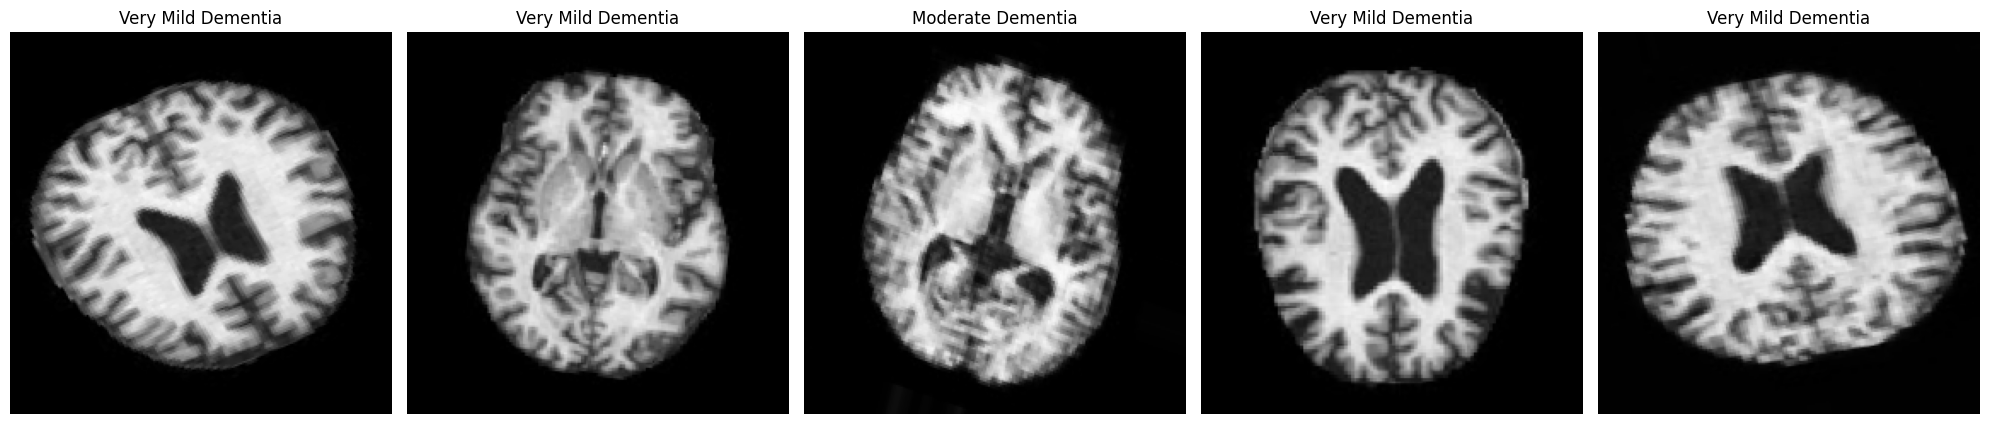

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Setting up the figure for visualization
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

# Class labels from the dataset
class_labels = ['Mild Dementia', 'Moderate Dementia', 'No Dementia', 'Very Mild Dementia']

# Visualizing 5 random images from the training dataset
for i in tqdm(range(5)):
    # Generate a random index for the batch and the image within the batch
    batch_index = np.random.randint(len(train_generator))
    image_index = np.random.randint(train_generator.batch_size)

    # Fetch a batch of images and labels
    images, labels = train_generator[batch_index]

    # Get the image and its corresponding label
    image = images[image_index]
    label = labels[image_index]

    # Display the image
    ax[i].imshow(image)
    ax[i].axis('off')

    # Get the class index and set the title accordingly
    class_index = np.argmax(label)
    ax[i].set_title(class_labels[class_index])

plt.tight_layout()
plt.show()


In [6]:
from tensorflow.keras.applications import DenseNet169

# Initialize the base DenseNet169 model
base_model = DenseNet169(input_shape=(224, 224, 3),  # Input image size
                         include_top=False,          # Exclude the top fully connected layers
                         weights="imagenet")         # Use pre-trained weights from ImageNet

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

print("DenseNet169 base model initialized with ImageNet weights.")


51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
DenseNet169 base model initialized with ImageNet weights.


In [7]:
# Freezing all layers in the DenseNet169 model to prevent training updates on pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

print("All layers in DenseNet169 base model have been frozen.")


All layers in DenseNet169 base model have been frozen.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense, Activation

# Initialize the model
model = Sequential()

# Add the pre-trained DenseNet169 base model
model.add(base_model)

# Add Dropout for regularization
model.add(Dropout(0.5))

# Flatten the output of the base model
model.add(Flatten())

# Add BatchNormalization layer for stable training
model.add(BatchNormalization())

# Add a fully connected (dense) layer with 2048 units and 'he_uniform' initializer
model.add(Dense(2048, kernel_initializer='he_uniform'))

# Add another BatchNormalization layer
model.add(BatchNormalization())

# Add ReLU activation
model.add(Activation('relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Add a second dense layer with 1024 units
model.add(Dense(1024, kernel_initializer='he_uniform'))

# Add another BatchNormalization layer
model.add(BatchNormalization())

# Add ReLU activation
model.add(Activation('relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Final output layer with 4 units (for 4 classes: Mild, Moderate, No Dementia, Very Mild)
model.add(Dense(4, activation='softmax'))

print("Model built successfully.")


Model built successfully.


In [9]:
# Display the model architecture summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet169 (Functional)             │ (None, 7, 7, 1664)          │      12,642,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 1664)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 81536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 81536)               │         326,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │     166,987,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,071,364 (694.55 MB)

 Trainable params: 169,259,268 (645.67 MB)

 Non-trainable params: 12,812,096 (48.87 MB)

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# Initialize Adam optimizer with learning rate
OPT = Adam(learning_rate=0.001)

# Compile the model
model.compile(loss='categorical_crossentropy',           # Loss function for multi-class classification
              metrics=[AUC(name='auc')],                 # AUC metric for evaluating model performance
              optimizer=OPT)

print("Model compiled successfully.")


Model compiled successfully.


In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Path to save the best model weights
filepath = './best_weights.keras'  # Changed extension to .keras

# EarlyStopping callback to stop training if AUC does not improve for 15 epochs
earlystopping = EarlyStopping(monitor='val_auc',
                              mode='max',
                              patience=15,      # Stop after 15 epochs without improvement
                              verbose=1)

# ModelCheckpoint callback to save the best model based on validation AUC
checkpoint = ModelCheckpoint(filepath,
                              monitor='val_auc',
                              mode='max',
                              save_best_only=True,  # Save only the best model
                              verbose=1)

# Combine the callbacks into a list
callback_list = [earlystopping, checkpoint]

print("Callbacks defined successfully.")


Callbacks defined successfully.


In [12]:
# Train the model using the dataset generators
model_history = model.fit(train_generator,
                          validation_data=valid_generator,
                          epochs=500,
                          callbacks=callback_list,
                          verbose=1)


Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - auc: 0.7917 - loss: 1.2797
Epoch 1: val_auc improved from -inf to 0.87223, saving model to ./best_weights.keras
256/256 ━━━━━━━━━━━━━━━━━━━━ 212s 648ms/step - auc: 0.7919 - loss: 1.2788 - val_auc: 0.8722 - val_loss: 1.0130
Epoch 2/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - auc: 0.8999 - loss: 0.7910
Epoch 2: val_auc improved from 0.87223 to 0.89822, saving model to ./best_weights.keras
256/256 ━━━━━━━━━━━━━━━━━━━━ 169s 609ms/step - auc: 0.9000 - loss: 0.7908 - val_auc: 0.8982 - val_loss: 0.8043
Epoch 3/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - auc: 0.9235 - loss: 0.6690
Epoch 3: val_auc improved from 0.89822 to 0.91264, saving model to ./best_weights.keras
256/256 ━━━━━━━━━━━━━━━━━━━━ 158s 609ms/step - auc: 0.9235 - loss: 0.6689 - val_auc: 0.9126 - val_loss: 0.7258
Epoch 4/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - auc: 0.9364 - loss: 0.6000
Epoch 4: val_auc improved from 0.91264 to 0.91754, saving model to ./best_weights.

In [4]:
# Save the model in Colab's local environment
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/alzheimers_disease_detection_model_epoch_28.h5')  # Replace XX with the appropriate epoch


ValueError: File not found: filepath=/content/drive/MyDrive/alzheimers_disease_detection_model_epoch_28.keras. Please ensure the file is an accessible `.keras` zip file.

In [2]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/alzheimers_disease_detection_model.keras')


ValueError: File not found: filepath=/content/drive/MyDrive/alzheimers_disease_detection_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
from google.colab import files

# Create a downloadable link for the model
files.download('/content/alzheimers_disease_detection_model.keras')
